In [5]:
import numpy as np 
import pandas as pd

In [6]:
df=pd.read_csv("customer_churn_data.csv")

In [7]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [8]:
df.sample(5)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
874,875,44,Female,21,45.92,Month-to-Month,DSL,964.32,Yes,Yes
751,752,31,Female,8,80.78,One-Year,Fiber Optic,646.24,Yes,Yes
506,507,39,Male,57,103.69,Two-Year,DSL,5910.33,Yes,Yes
156,157,63,Female,16,90.98,Two-Year,DSL,1455.68,Yes,No
477,478,48,Female,12,95.97,Two-Year,NaN,1151.64,No,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [10]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [11]:
df['InternetService']=df['InternetService'].fillna("")

In [12]:
df.isnull().sum().sum()

0

In [13]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,,2208.32,No,Yes


In [14]:
df.duplicated().sum()

0

In [15]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [16]:
numeric_column_data=df.select_dtypes(include=['number'])

In [17]:
numeric_column_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [18]:
import seaborn as sns

<Axes: >

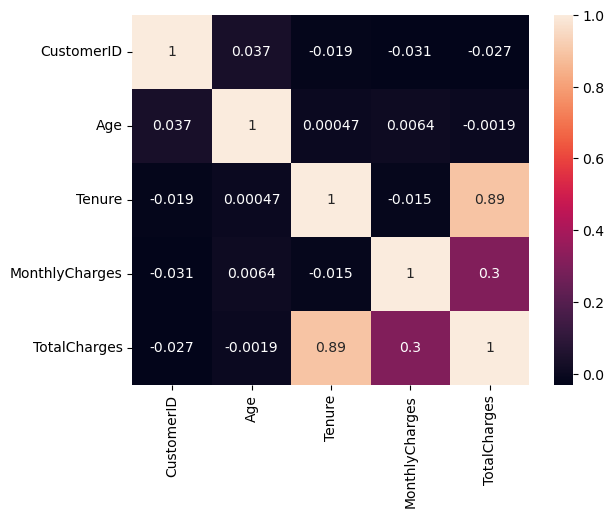

In [19]:
sns.heatmap(numeric_column_data.corr(),annot=True)

In [20]:
df['Churn'].value_counts()

Churn
Yes    883
No     117
Name: count, dtype: int64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5200\798377898.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Churn'],palette=color)


Text(0.5, 1.0, 'Churn count')

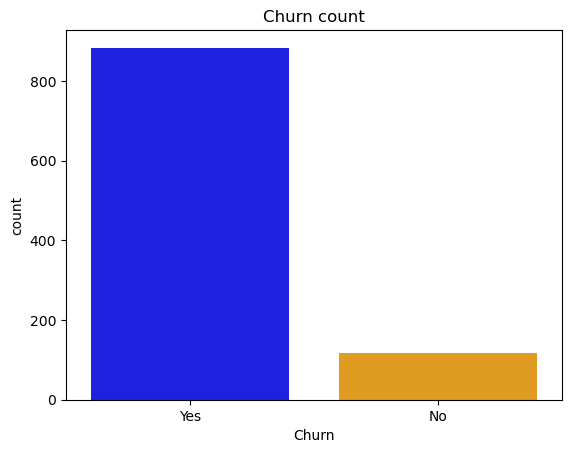

In [21]:
import matplotlib.pyplot as plt
color={'Yes':'blue','No':'orange'}
sns.countplot(x=df['Churn'],palette=color)
plt.title("Churn count")


In [22]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

In [23]:
df.groupby(['Churn','Gender'])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [24]:
df.groupby('Churn')['Tenure'].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [25]:
df.groupby('Churn')['Age'].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

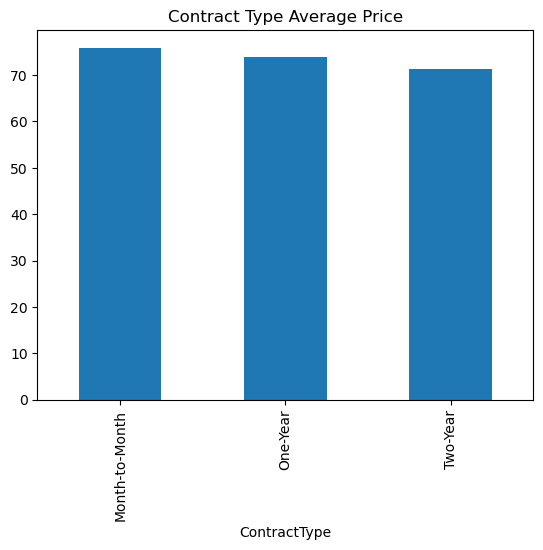

In [26]:
df.groupby('ContractType')['MonthlyCharges'].mean().plot(kind='bar')
plt.title("Contract Type Average Price")
plt.show()


<Axes: xlabel='MonthlyCharges', ylabel='Count'>

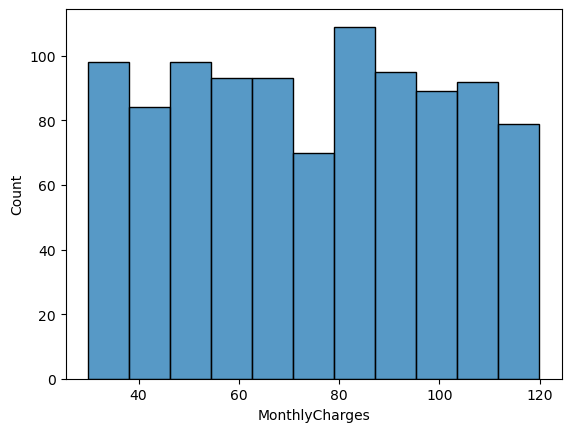

In [27]:
sns.histplot(df['MonthlyCharges'])

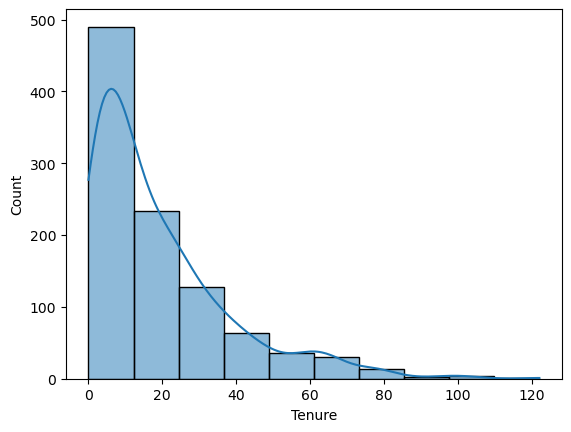

In [28]:
sns.histplot(df['Tenure'],kde=True,bins=10)
plt.show()

In [29]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [30]:
y=df[['Churn']]
X=df[['Age','Gender','Tenure','MonthlyCharges']]

In [31]:
y.value_counts()

Churn
Yes      883
No       117
Name: count, dtype: int64

In [32]:
X['Gender']=X['Gender'].apply(lambda x:1 if x=='Female' else 0)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5200\3026748092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender']=X['Gender'].apply(lambda x:1 if x=='Female' else 0)


In [33]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [34]:
y['Churn']=y['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_5200\3125214500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Churn']=y['Churn'].apply(lambda x: 1 if x=='Yes' else 0)


In [35]:
y.value_counts()

Churn
1        883
0        117
Name: count, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [38]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print("Accuracy score on model is {}".format(accuracy_score(y_test,predictions)))

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [40]:
lr=LogisticRegression()
lr.fit(X_train,y_train)


c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [41]:
y_pred=lr.predict(X_test)

In [42]:
modelperformance(y_pred)

Accuracy score on model is 0.86


In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
param_grid={
    'n_neighbors':[3,5,7,9],
    'weights':['uniform','distance']
}

In [45]:
gridkn=GridSearchCV(KNeighborsClassifier(),param_grid=param_grid,cv=10)

In [46]:
gridkn.fit(X_train,y_train)

c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [47]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [48]:
y_pred1=gridkn.predict(X_test)

In [49]:
modelperformance(y_pred1)

Accuracy score on model is 0.855


In [50]:
from sklearn.svm import SVC

In [51]:
svm=SVC()

In [52]:
param_grid={
    'C':[0.01,0.1,0.5,1,],
    'kernel':['linear','rbf','poly'],
}

In [53]:
grid = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [54]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [55]:
y_pred2=grid.predict(X_test)

In [56]:
modelperformance(y_pred2)

Accuracy score on model is 0.865


In [57]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
param_grid={
    'n_estimators':[32,64,128,256],
    'max_features':[2,3,4],
    'bootstrap':[True,False]
}

In [65]:
grids = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grids.fit(X_train, y_train)

c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]},
             scoring='accuracy')

In [66]:
grids.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 128}

In [68]:
y_pred=grids.predict(X_test)
modelperformance(y_pred)

Accuracy score on model is 0.84
